Data: https://dadosabertos.tse.jus.br/dataset/

In [37]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('ggplot')

Data import

In [38]:
df = pd.read_csv('/content/clean_data.csv')
df.shape

(518675, 29)

In [39]:
df.head()

,Unnamed: 0,uf,type_id,codigo_tse,nome_municipio,capital,codigo_ibge,job_count,elector_count,elector_presence,absentees,nominal_votes,blank_votes,total_null_votes,null_votes,technical_null_votes,valid_votes,nulled_votes,judically_nulled_votes,vote_count,candidate_number,candidate_name,candidate_coligation,candidate_vice_name,candidate_vote_destination,candidate_vote_count,legend_votes,job,main_party
0,0,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,11,CAETANO,PP - PP / SOLIDARIEDADE / PSD,MARQUINHOS,Válido,2405,NaN,prefeito,PP
1,1,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,12,HADAMÉS WILSON,PDT,LUCAS NOBRE,Válido,1237,NaN,prefeito,PDT
2,2,AC,11,1120,ACRELÂNDIA,0,1200013,1,s,7093,2076,6849,54,190,190,0,6849,0,0,7093,15,OLAVINHO,MDB - PL / MDB / PSDB,GRAIA,Válido,2638,NaN,prefeito,MDB
3,3,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,90,ROSA DO EURICO,PROS - PSL / PROS,LUIZ DO GÁS,Válido,569,NaN,prefeito,PROS
4,4,AC,13,1120,ACRELÂNDIA,0,1200013,9,n,7093,2076,6482,76,120,120,0,6897,0,0,7093,11130,PAULA CLEURIDES,PP,,Válido,1,415.0,vereador,PP


In [40]:
df.tail()

,Unnamed: 0,uf,type_id,codigo_tse,nome_municipio,capital,codigo_ibge,job_count,elector_count,elector_presence,absentees,nominal_votes,blank_votes,total_null_votes,null_votes,technical_null_votes,valid_votes,nulled_votes,judically_nulled_votes,vote_count,candidate_number,candidate_name,candidate_coligation,candidate_vice_name,candidate_vote_destination,candidate_vote_count,legend_votes,job,main_party
518670,518670,TO,13,96431,XAMBIOÁ,0,1722107,9,n,6814,1294,6142,40,221,221,0,6553,0,0,6814,23610,IRACI,CIDADANIA,,Válido,11,411.0,vereador,CIDADANIA
518671,518671,TO,13,96431,XAMBIOÁ,0,1722107,9,n,6814,1294,6142,40,221,221,0,6553,0,0,6814,43888,WANILDE AVELINO,PV,,Válido,22,411.0,vereador,PV
518672,518672,TO,13,96431,XAMBIOÁ,0,1722107,9,n,6814,1294,6142,40,221,221,0,6553,0,0,6814,17555,GILVAN MARTINS,PSL,,Válido,61,411.0,vereador,PSL
518673,518673,TO,13,96431,XAMBIOÁ,0,1722107,9,n,6814,1294,6142,40,221,221,0,6553,0,0,6814,43444,ALANE MONTEIRO,PV,,Válido,5,411.0,vereador,PV
518674,518674,TO,13,96431,XAMBIOÁ,0,1722107,9,n,6814,1294,6142,40,221,221,0,6553,0,0,6814,25123,PROFESSOR PAULO,DEM,,Válido,132,411.0,vereador,DEM


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518675 entries, 0 to 518674
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  518675 non-null  int64  
 1   uf                          518675 non-null  object 
 2   type_id                     518675 non-null  int64  
 3   codigo_tse                  518675 non-null  int64  
 4   nome_municipio              518675 non-null  object 
 5   capital                     518675 non-null  int64  
 6   codigo_ibge                 518675 non-null  int64  
 7   job_count                   518675 non-null  int64  
 8   elector_count               518675 non-null  object 
 9   elector_presence            518675 non-null  int64  
 10  absentees                   518675 non-null  int64  
 11  nominal_votes               518675 non-null  int64  
 12  blank_votes                 518675 non-null  int64  
 13  total_null_vot

In [42]:
df.isnull().sum()

Unnamed: 0                        0
uf                                0
type_id                           0
codigo_tse                        0
nome_municipio                    0
capital                           0
codigo_ibge                       0
job_count                         0
elector_count                     0
elector_presence                  0
absentees                         0
nominal_votes                     0
blank_votes                       0
total_null_votes                  0
null_votes                        0
technical_null_votes              0
valid_votes                       0
nulled_votes                      0
judically_nulled_votes            0
vote_count                        0
candidate_number                  0
candidate_name                    3
candidate_coligation              0
candidate_vice_name               0
candidate_vote_destination        0
candidate_vote_count              0
legend_votes                  18640
job                         

In [43]:
df.nunique()

Unnamed: 0                    518675
uf                                26
type_id                            2
codigo_tse                      5568
nome_municipio                  5294
capital                            2
codigo_ibge                     5568
job_count                         33
elector_count                      2
elector_presence                4864
absentees                       3562
nominal_votes                   8361
blank_votes                     1784
total_null_votes                2194
null_votes                      2177
technical_null_votes             236
valid_votes                     8402
nulled_votes                      10
judically_nulled_votes          1046
vote_count                      4864
candidate_number               20334
candidate_name                394364
candidate_coligation            7941
candidate_vice_name            16997
candidate_vote_destination         4
candidate_vote_count            8730
legend_votes                    1736
j

In [44]:
df.drop(columns=['Unnamed: 0'], inplace = True)

In [45]:
df.head()

,uf,type_id,codigo_tse,nome_municipio,capital,codigo_ibge,job_count,elector_count,elector_presence,absentees,nominal_votes,blank_votes,total_null_votes,null_votes,technical_null_votes,valid_votes,nulled_votes,judically_nulled_votes,vote_count,candidate_number,candidate_name,candidate_coligation,candidate_vice_name,candidate_vote_destination,candidate_vote_count,legend_votes,job,main_party
0,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,11,CAETANO,PP - PP / SOLIDARIEDADE / PSD,MARQUINHOS,Válido,2405,NaN,prefeito,PP
1,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,12,HADAMÉS WILSON,PDT,LUCAS NOBRE,Válido,1237,NaN,prefeito,PDT
2,AC,11,1120,ACRELÂNDIA,0,1200013,1,s,7093,2076,6849,54,190,190,0,6849,0,0,7093,15,OLAVINHO,MDB - PL / MDB / PSDB,GRAIA,Válido,2638,NaN,prefeito,MDB
3,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,90,ROSA DO EURICO,PROS - PSL / PROS,LUIZ DO GÁS,Válido,569,NaN,prefeito,PROS
4,AC,13,1120,ACRELÂNDIA,0,1200013,9,n,7093,2076,6482,76,120,120,0,6897,0,0,7093,11130,PAULA CLEURIDES,PP,,Válido,1,415.0,vereador,PP


In [46]:
df.tail()

,uf,type_id,codigo_tse,nome_municipio,capital,codigo_ibge,job_count,elector_count,elector_presence,absentees,nominal_votes,blank_votes,total_null_votes,null_votes,technical_null_votes,valid_votes,nulled_votes,judically_nulled_votes,vote_count,candidate_number,candidate_name,candidate_coligation,candidate_vice_name,candidate_vote_destination,candidate_vote_count,legend_votes,job,main_party
518670,TO,13,96431,XAMBIOÁ,0,1722107,9,n,6814,1294,6142,40,221,221,0,6553,0,0,6814,23610,IRACI,CIDADANIA,,Válido,11,411.0,vereador,CIDADANIA
518671,TO,13,96431,XAMBIOÁ,0,1722107,9,n,6814,1294,6142,40,221,221,0,6553,0,0,6814,43888,WANILDE AVELINO,PV,,Válido,22,411.0,vereador,PV
518672,TO,13,96431,XAMBIOÁ,0,1722107,9,n,6814,1294,6142,40,221,221,0,6553,0,0,6814,17555,GILVAN MARTINS,PSL,,Válido,61,411.0,vereador,PSL
518673,TO,13,96431,XAMBIOÁ,0,1722107,9,n,6814,1294,6142,40,221,221,0,6553,0,0,6814,43444,ALANE MONTEIRO,PV,,Válido,5,411.0,vereador,PV
518674,TO,13,96431,XAMBIOÁ,0,1722107,9,n,6814,1294,6142,40,221,221,0,6553,0,0,6814,25123,PROFESSOR PAULO,DEM,,Válido,132,411.0,vereador,DEM


In [47]:
df['job'].unique(), df['elector_count'].unique()

(array(['prefeito', 'vereador'], dtype=object),
 array(['n', 's'], dtype=object))

In [48]:
mayor_query = df[
    (df['job'] == 'prefeito') &
    (df['elector_count'] == 's')
]

mayor_query.shape

(5519, 28)

In [49]:
analysis1 = mayor_query.groupby(by = ['main_party']).agg(
    quantity = ('candidate_vote_count', 'count')
)

analysis1.head()

,quantity
main_party,
AVANTE,82
CIDADANIA,141
DC,1
DEM,467
MDB,787


In [50]:
qty_mayors_elected = analysis1['quantity'].sum()

qty_mayors_elected

5519

In [51]:
analysis1['%'] = analysis1['quantity'] / qty_mayors_elected * 100
analysis1['%'] = round(analysis1['%'], 2)

analysis1.sort_values('quantity', inplace = True, ascending = False)

analysis1.head()

,quantity,%
main_party,,
MDB,787,14.26
PP,687,12.45
PSD,660,11.96
PSDB,526,9.53
DEM,467,8.46


In [52]:
sns.color_palette('magma', len(analysis1))

[(0.013708, 0.011771, 0.068667),
 (0.04383, 0.03383, 0.141886),
 (0.078815, 0.054184, 0.211667),
 (0.123833, 0.067295, 0.295879),
 (0.171713, 0.067305, 0.370771),
 (0.232077, 0.059889, 0.437695),
 (0.284951, 0.063168, 0.472451),
 (0.341482, 0.080564, 0.492631),
 (0.390384, 0.100379, 0.501864),
 (0.445163, 0.122724, 0.506901),
 (0.494258, 0.141462, 0.507988),
 (0.550287, 0.161158, 0.505719),
 (0.600868, 0.177743, 0.500394),
 (0.658483, 0.196027, 0.490253),
 (0.716387, 0.214982, 0.47529),
 (0.767398, 0.233705, 0.457755),
 (0.822926, 0.259016, 0.433573),
 (0.868793, 0.287728, 0.409303),
 (0.913354, 0.330052, 0.382563),
 (0.944006, 0.377643, 0.365136),
 (0.967671, 0.439703, 0.35981),
 (0.981, 0.498428, 0.369734),
 (0.990138, 0.565296, 0.395122),
 (0.994738, 0.62435, 0.427397),
 (0.997077, 0.690088, 0.471811),
 (0.997228, 0.747981, 0.516859),
 (0.99568, 0.812706, 0.572645),
 (0.99317, 0.870024, 0.626189),
 (0.989815, 0.934329, 0.690198)]

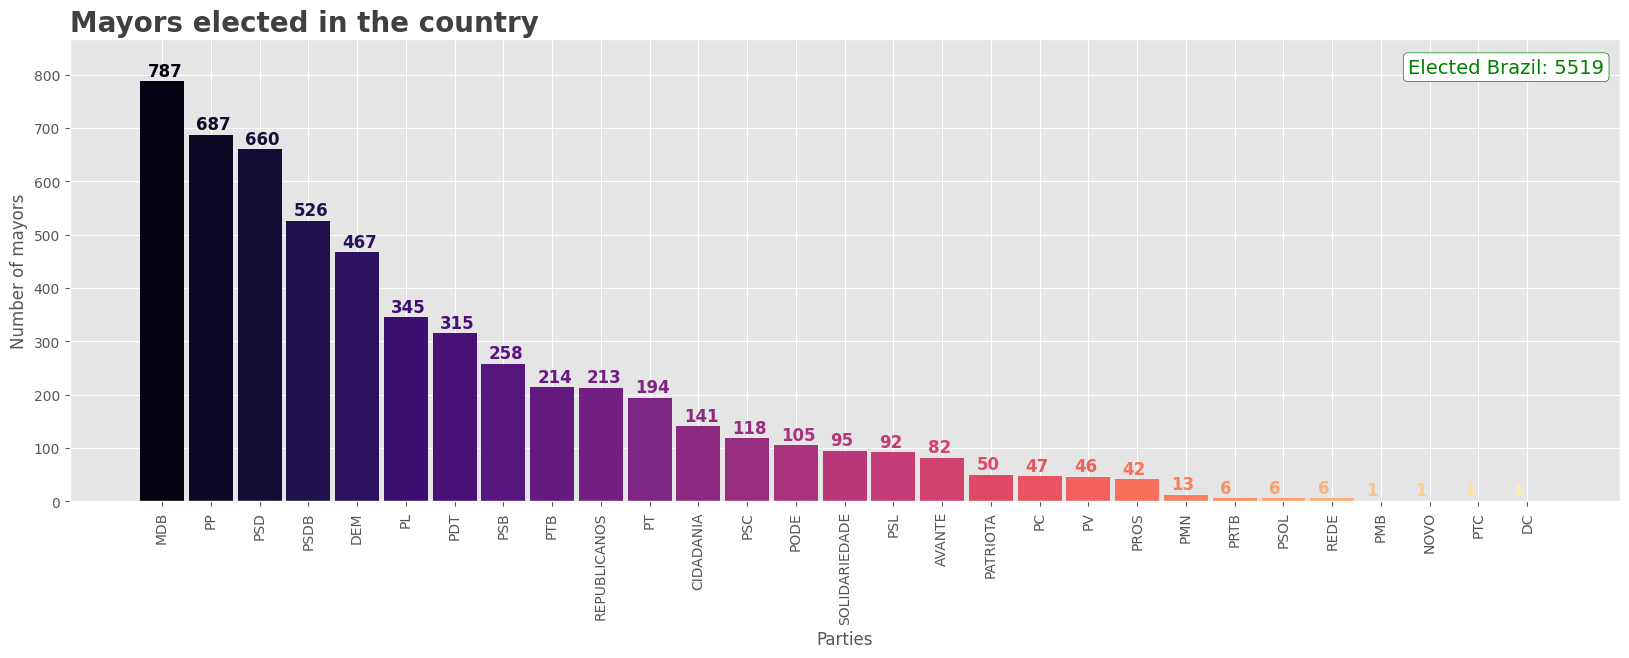

In [79]:
plt.figure(figsize = (20, 6))

color_palette = sns.color_palette('magma', len(analysis1))

plt.bar(
    analysis1.index,
    analysis1['quantity'],
    width = 0.9,
    color = color_palette
)

plt.title('Mayors elected in the country', loc = 'left', fontsize = 20, color = '#404040', fontweight = 600)

plt.ylabel('Number of mayors')
plt.xlabel('Parties')
plt.xticks(rotation = 90)

plt.ylim(0, analysis1['quantity'].max() + (analysis1['quantity'].max() * 0.1))

for position, value in enumerate(analysis1['quantity']):
  plt.text(
      position - 0.3, value + 10 ,
      value,
      color = color_palette[position],
      size = 12,
      fontweight = 700
)

total_elected = analysis1['quantity'].sum()

plt.annotate(
    f'Elected Brazil: {total_elected}',
    xy = (0.99, 0.94),
    xycoords = 'axes fraction',
    ha = 'right',
    va = 'center',
    color = 'green',
    fontsize = 14,
    fontweight = 500,
    bbox = dict(facecolor = '#ffffff', edgecolor = 'green', boxstyle = 'round', pad = 0.25),
);

In [74]:
councilors_query = df[
    (df['job'] == 'vereador') &
    (df['elector_count'] == 's')
]

councilors_query.shape

(57866, 28)

In [75]:
analysis2 = councilors_query.groupby(by = ['main_party']).agg(
    quantity = ('candidate_vote_count', 'count')
)

analysis2.head()

,quantity
main_party,
AVANTE,1046
CIDADANIA,1583
DC,121
DEM,4335
MDB,7311


In [76]:
qty_elected_councillors = analysis2['quantity'].sum()

qty_elected_councillors

57866

In [78]:
analysis2['%'] = analysis2['quantity'] / qty_elected_councillors * 100
analysis2['%'] = round(analysis2['%'], 2)

analysis2.sort_values('quantity', inplace = True, ascending = False)

analysis2.head()

,quantity,%
main_party,,
MDB,7311,12.63
PP,6331,10.94
PSD,5676,9.81
PSDB,4368,7.55
DEM,4335,7.49


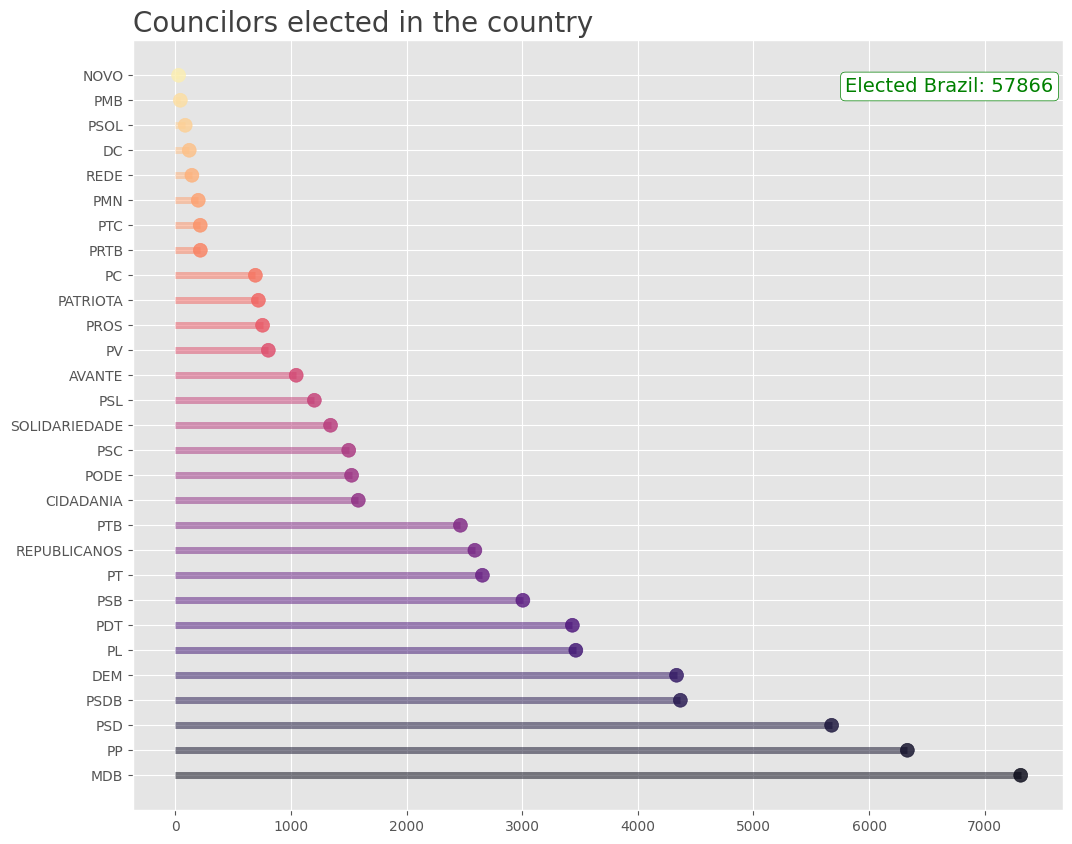

In [80]:
plt.figure(figsize = (12, 10))

plt.hlines(
    y = analysis2.index,
    xmin = 0,
    xmax = analysis2['quantity'],
    lw = 5,
    color = color_palette,
    alpha = 0.5
 )

plt.scatter(
    analysis2['quantity'],
    analysis2.index,
    s = 100,
    color = color_palette,
    alpha = 0.8
)

plt.title('Councilors elected in the country', loc = 'left', fontsize = 20, color = '#404040', fontweight = 500)

total_elected = analysis2['quantity'].sum()

plt.annotate(
    f'Elected Brazil: {total_elected}',
    xy = (0.99, 0.94),
    xycoords = 'axes fraction',
    ha = 'right',
    va = 'center',
    color = 'green',
    fontsize = 14,
    fontweight = 500,
    bbox = dict(facecolor = '#ffffff', edgecolor = 'green', boxstyle = 'round', pad = 0.25),
);

In [59]:
len(analysis1), len(analysis2)

(29, 29)

In [85]:
tab_correlation = analysis1['quantity'].reset_index()

tab_correlation = pd.merge(tab_correlation, analysis2.reset_index(), on = ['main_party'], how = 'inner')

tab_correlation.columns = ['Parties', 'Mayors', 'Councilors', '%']

tab_correlation.drop(columns = ['%'], inplace = True)

tab_correlation.head()

,Parties,Mayors,Councilors
0,MDB,787,7311
1,PP,687,6331
2,PSD,660,5676
3,PSDB,526,4368
4,DEM,467,4335


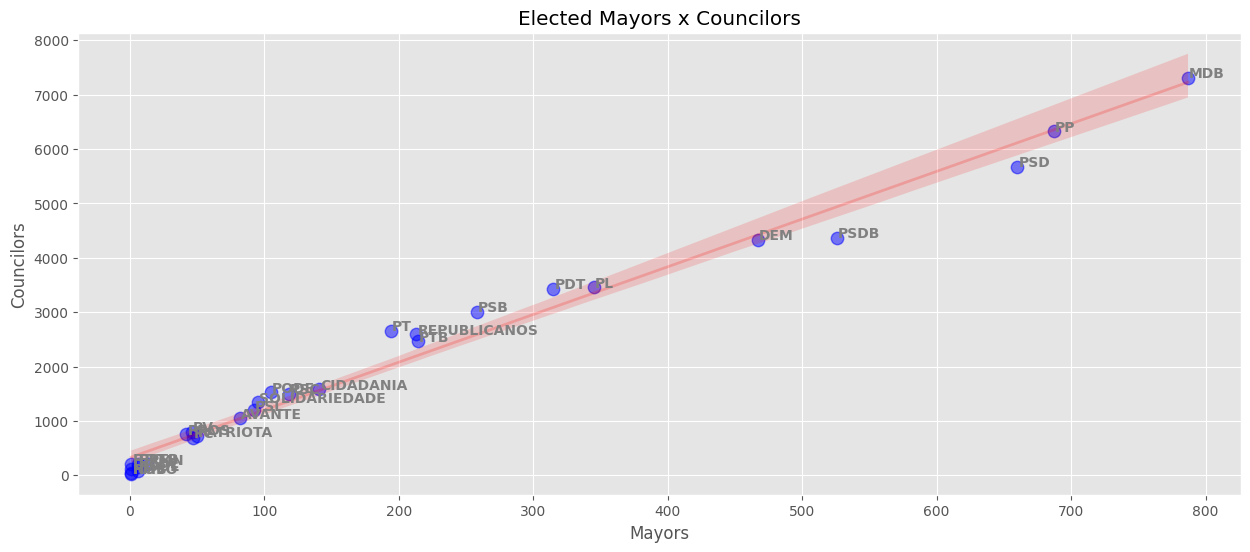

In [86]:
sns.regplot(
    x = tab_correlation['Mayors'],
    y = tab_correlation['Councilors'],

    ci = 95,

    scatter_kws = {
        'color' : 'blue',
        's' : 80,
        'alpha' : 0.5
    },

    line_kws = {
        'color' : 'red',
        'alpha' : 0.2,
        'lw' : 2
    },
)

plt.title('Elected Mayors x Councilors');

for line in range(0, tab_correlation.shape[0]):

  plt.text(
      tab_correlation['Mayors'][line] + 0.8,
      tab_correlation['Councilors'][line],
      tab_correlation['Parties'][line],
      size = 'medium',
      color = 'gray',
      weight = 'semibold'
);

In [87]:
candidates_qty = df.groupby(by = ['main_party']).count().iloc[:, 0:1].reset_index()

candidates_qty.columns = ['Parties', 'Candidates']

candidates_qty.head()

,Parties,Candidates
0,AVANTE,14228
1,CIDADANIA,16390
2,DC,4385
3,DEM,31212
4,MDB,42169


In [88]:
tab_correlation.head()

,Parties,Mayors,Councilors
0,MDB,787,7311
1,PP,687,6331
2,PSD,660,5676
3,PSDB,526,4368
4,DEM,467,4335


In [89]:
tab_correlation = pd.merge(tab_correlation, candidates_qty, on = ['Parties'], how='inner')

tab_correlation.head()

,Parties,Mayors,Councilors,Candidates
0,MDB,787,7311,42169
1,PP,687,6331,36158
2,PSD,660,5676,37271
3,PSDB,526,4368,31011
4,DEM,467,4335,31212


In [90]:
tab_correlation.corr()

#1 to -1
# next to 1 - positive (Both grow)
# next to -1 - negative (One grows, the other falls)

,Mayors,Councilors,Candidates
Mayors,1.000000,0.990918,0.916985
Councilors,0.990918,1.000000,0.952979
Candidates,0.916985,0.952979,1.000000


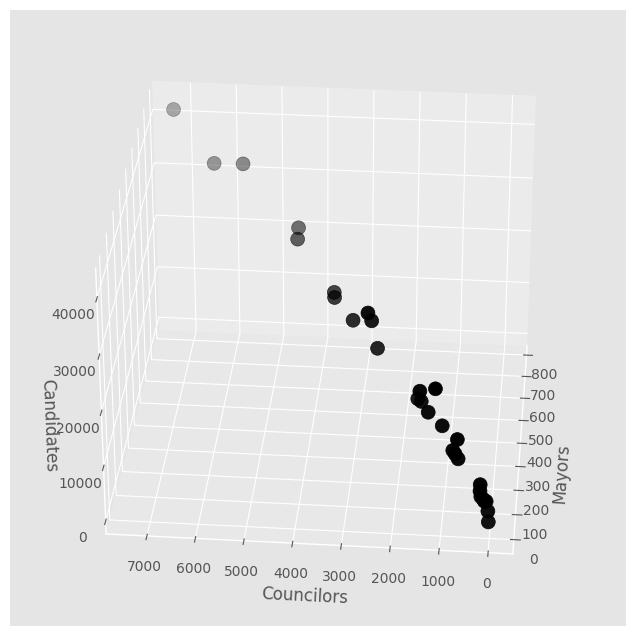

In [91]:
figure = plt.figure(figsize = (15, 8))

axle = figure.add_subplot(111, projection = '3d')

axle.scatter(
    tab_correlation['Mayors'],
    tab_correlation['Councilors'],
    tab_correlation['Candidates'],
    c = 'black',
    s = 100
)

axle.view_init(30, 185)

axle.set_xlabel('Mayors')
axle.set_ylabel('Councilors')
axle.set_zlabel('Candidates');

In [92]:
figure = px.scatter_3d(
    tab_correlation,
    x = 'Mayors',
    y = 'Councilors',
    z = 'Candidates',
    color = 'Parties',
    opacity = 0.7,
    symbol = 'Parties'
)

figure.show()